In [ ]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz

In [ ]:
# configurar as variáveis de ambiente e o Spark
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
!pip install -q findspark

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [ ]:
# iniciar uma sessão local
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt


spark = SparkSession.builder.master("local[*]").appName("DadosLoja").getOrCreate()

In [ ]:
from google.colab import files
arquivo=files.upload()

Saving base_info_produtos.csv to base_info_produtos.csv


In [ ]:
#Criação das funções do projeto


#Utiliza a função data para criar o Dataframe
#parâmetro 1 - Deve ser inserido o caminho do arquivo csv a ser importado
#parâmetro 2 - Deve ser inserido o separador dos dados que está sendo utilizado, normalmente ;
def data(caminho,separador=';'):

  # cRealiza o carregamento dos dados
  df = spark.read.csv(caminho, inferSchema=True, header=True, sep=separador)

  # Cria ou substitui uma exibição temporária local por este DataFrame.
  df.createOrReplaceTempView("df")

  # Returna o DataFrame criado
  return df

In [ ]:
#Função que retorna uma tabela da coluna escolhida
def tabela(var,total=10):
  #Executa a consulta no DataFrame utilizando sql
  spark.sql("SELECT "+var+",count("+var+") as qtds from df group by "+var+" order by qtds desc limit 10").show(total,False)

In [ ]:
#Função que exibe um gráfico da coluna escolhida
def grafico(var,total=10):

  dados=spark.sql("SELECT "+str(var)+" as nomes,count("+str(var)+") as qtds from df group by "+var+" order by qtds desc limit "+str(total))

  nomes=[]
  qtds=[]

  for val in dados.select("nomes").collect(): nomes.extend(val)
  for val in dados.select("qtds").collect(): qtds.extend(val)
 
  fig,ax = plt.subplots(figsize=(22,8))
  
  ax.barh(nomes,qtds,color=["orange","red","blue","yellow","gray","pink","black","green","lime","purple"])
  ax.set_title(var,fontsize=18)

  for idx, val in enumerate(qtds):
    txt = val
    y_coord=idx
    x_coord=val

    ax.text(x=x_coord,y=y_coord,s=txt,fontsize=16)

  
  plt.show()

In [ ]:
def vetor(var,total=10):

  dados=spark.sql("SELECT "+str(var)+" as nomes,count("+str(var)+") as qtds from df group by "+var+" order by qtds desc limit "+str(total))

  nomes=[]
  qtds=[]

  for val in dados.select("nomes").collect(): nomes.extend(val)
  for val in dados.select("qtds").collect(): qtds.extend(val)

  dados=[nomes,qtds]
  return dados

In [ ]:
#Cria o DataFrame
df=data("base_info_produtos.csv",separador='	')

#Exibe as 50 primeiras linhas do DataFrame
df.show(50,True)

+--------------------+--------------------+-----------------+--------------------+--------+---------+
|                nome|                tipo|            marca|           categoria|     cor|   modelo|
+--------------------+--------------------+-----------------+--------------------+--------+---------+
|Samsung UN40C6900...|                  TV|          Samsung|         Eletrônicos|    None|     None|
|Sapateira Limeira...|             Armario|        Politorno|    Casa e Decoração|    None|     None|
|Faqueiro Tramonti...|            Faqueiro|       Tramontina|    Casa e Decoração|    Inox|     None|
|Cartucho de tinta...|            Cartucho|               HP|                None|    None|     None|
|Bolsa Pure Evo Me...|               Bolsa|             Puma|   Moda e Acessórios|    None|     None|
|Docking Station 8...|     Docking Station|         Maxprint|         Eletrônicos|    None|     None|
| Bandeirante Ecojipe|        Mini Veículo|      Bandeirante|          Brinquedos|

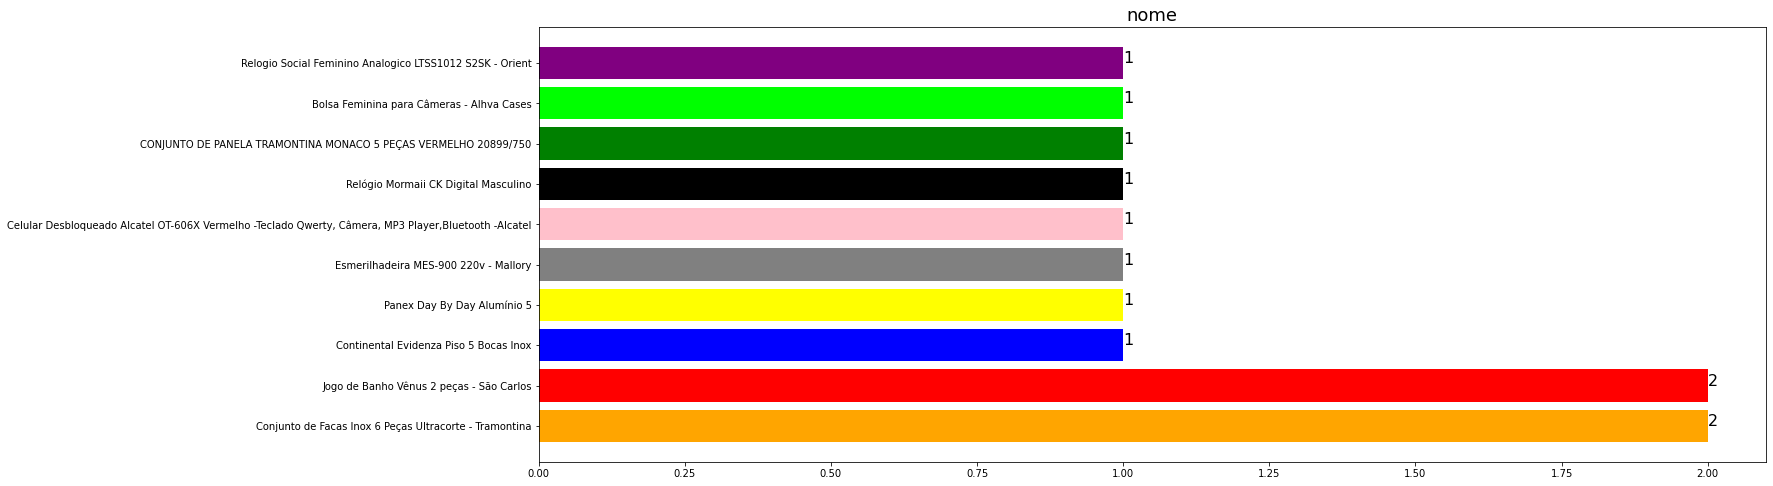

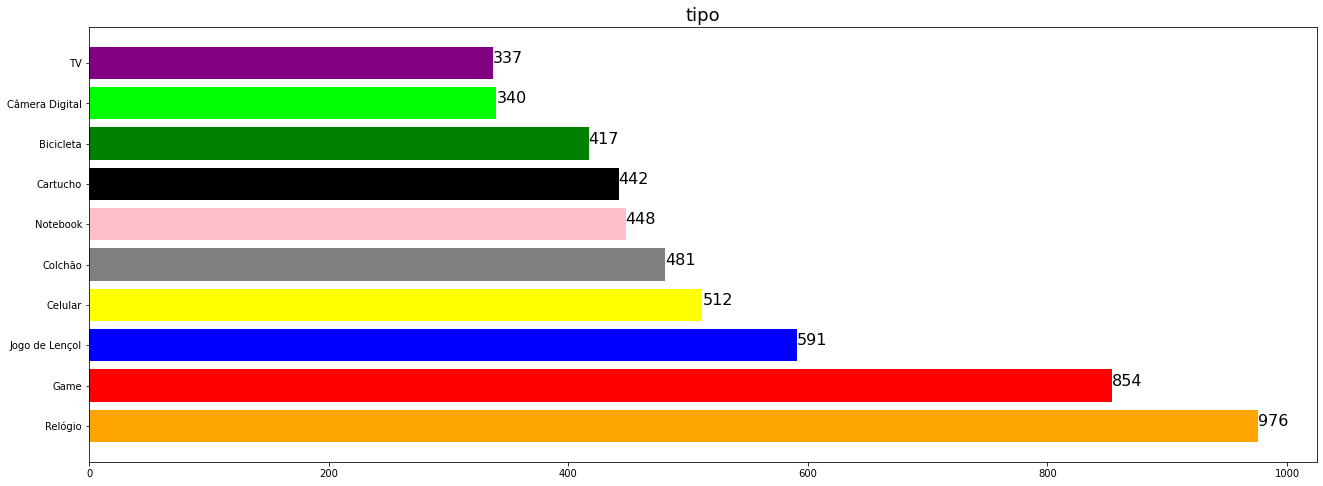

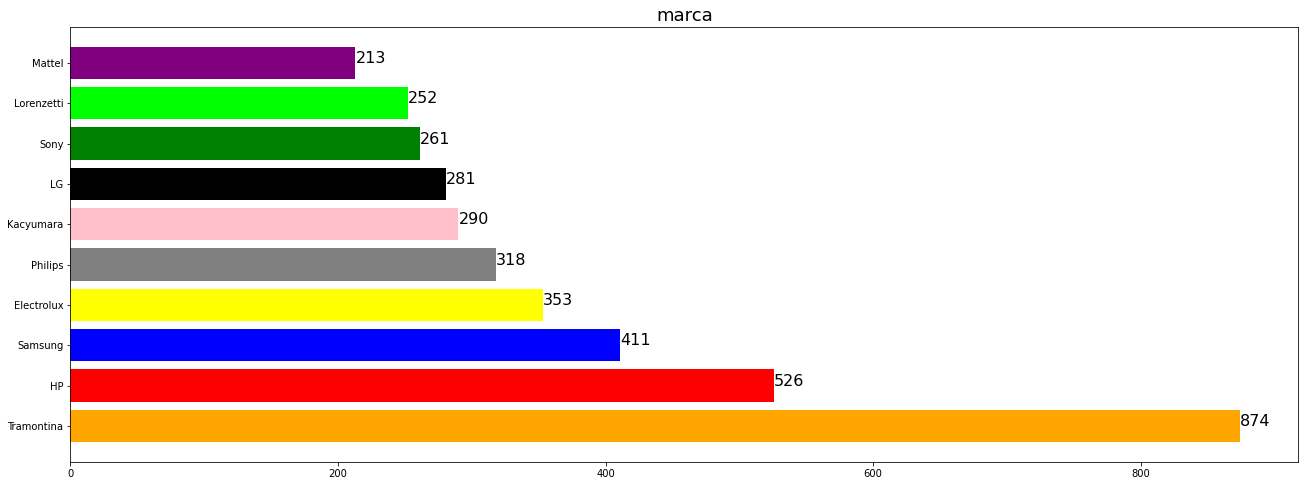

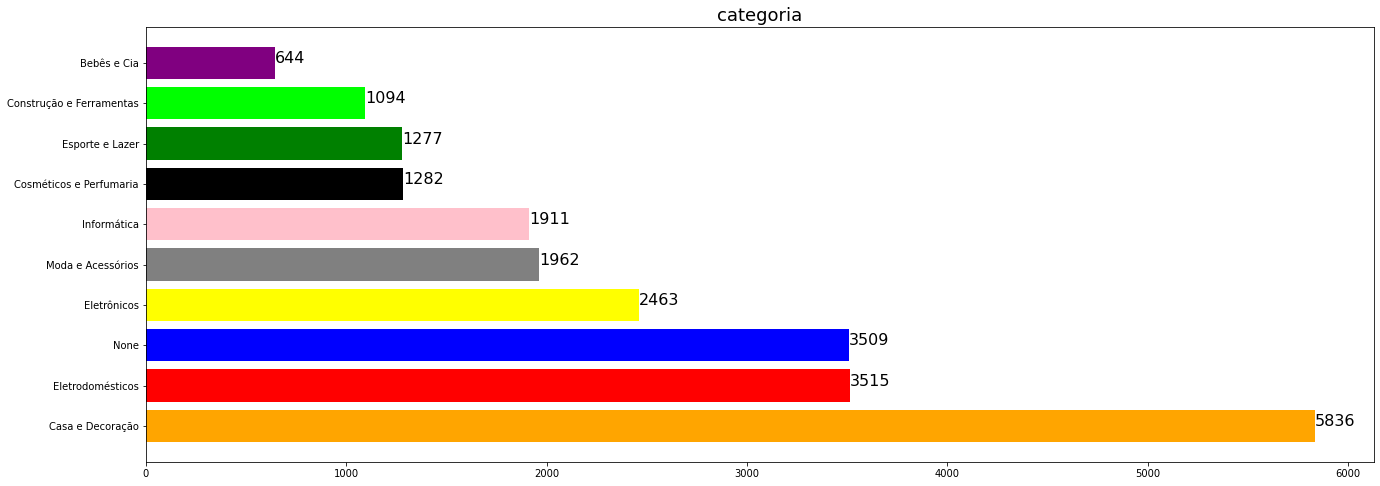

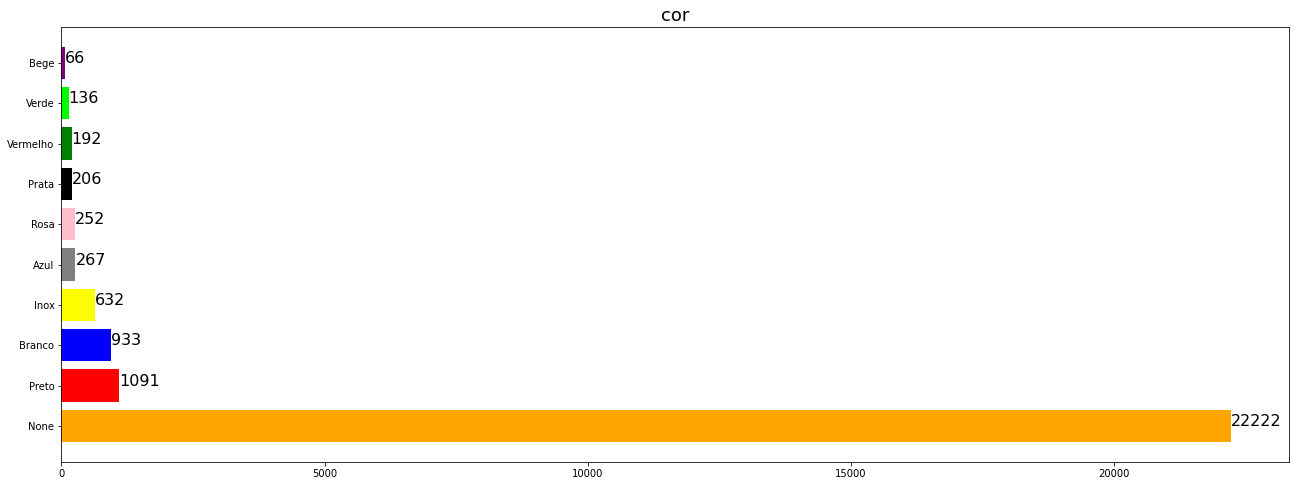

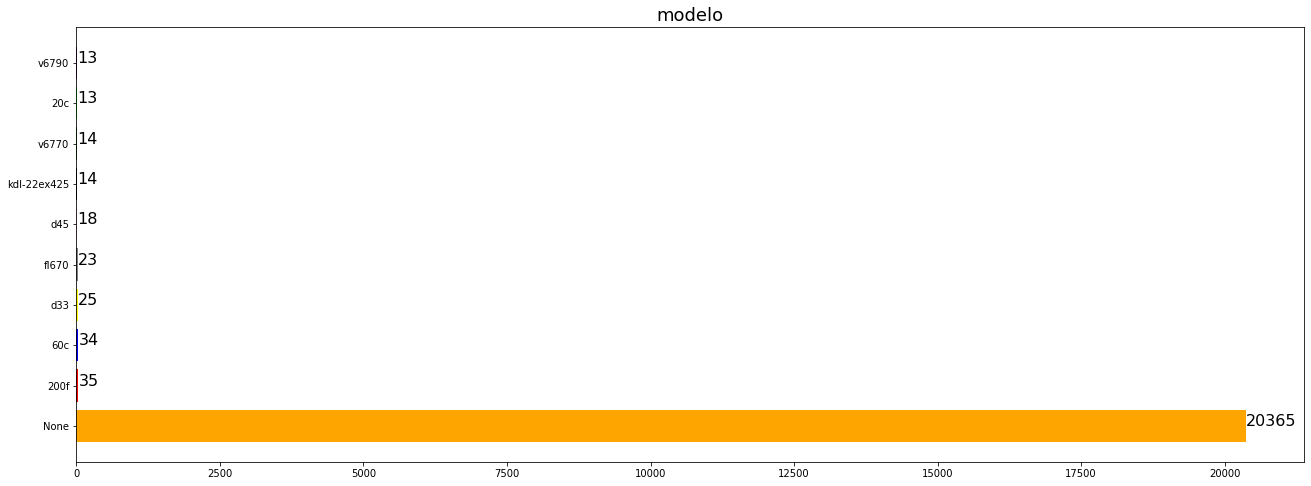

In [ ]:
grafico("nome")
grafico("tipo")
grafico("marca")
grafico("categoria")
grafico("cor")
grafico("modelo")

In [ ]:
tabela("nome")
tabela("tipo")
tabela("marca")
tabela("categoria")
tabela("cor")
tabela("modelo")

+----------------------------------------------------------------------------------------------------+----+
|nome                                                                                                |qtds|
+----------------------------------------------------------------------------------------------------+----+
|Conjunto de Facas Inox 6 Peças Ultracorte - Tramontina                                              |2   |
|Jogo de Banho Vênus 2 peças - São Carlos                                                            |2   |
|Calculadora Prática 8 Dígitos c/ Tampa - HL-820LV - Casio                                           |1   |
|Continental Evidenza Piso 5 Bocas Inox                                                              |1   |
|Esmerilhadeira MES-900 220v - Mallory                                                               |1   |
|Panex Day By Day Alumínio 5                                                                         |1   |
|Relógio Mormaii CK Digital 

+------------------------+----+
|categoria               |qtds|
+------------------------+----+
|Casa e Decoração        |5836|
|Eletrodomésticos        |3515|
|None                    |3509|
|Eletrônicos             |2463|
|Moda e Acessórios       |1962|
|Informática             |1911|
|Cosméticos e Perfumaria |1282|
|Esporte e Lazer         |1277|
|Construção e Ferramentas|1094|
|Bebês e Cia             |644 |
+------------------------+----+



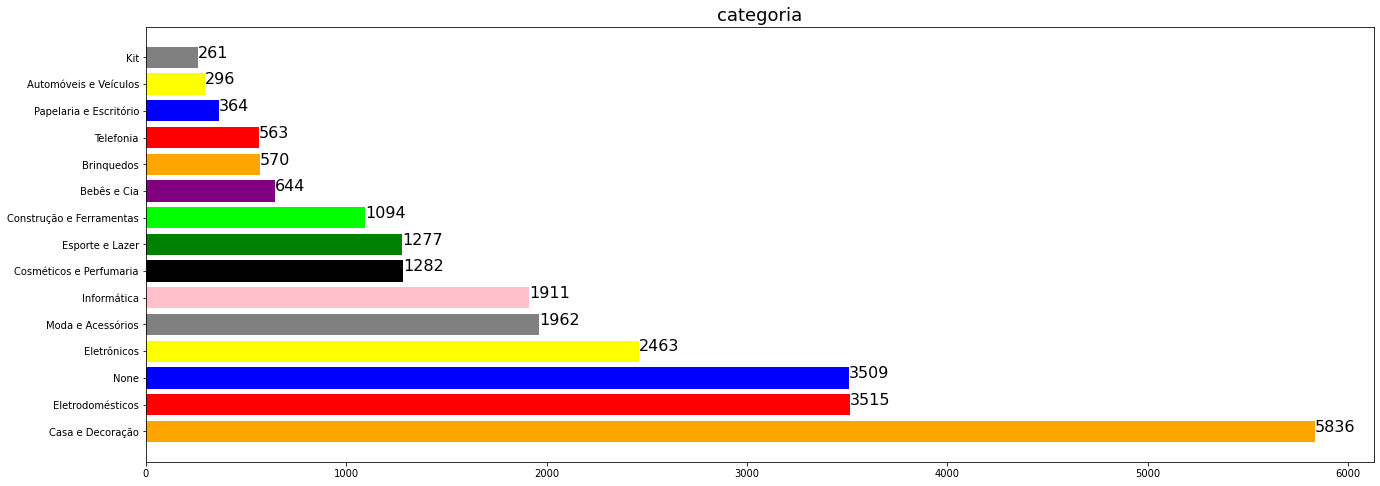

In [ ]:
tabela("categoria",15)
grafico("categoria",15)

In [ ]:
dados=vetor("nome",5)

dados[0][1] #Nome do primeiro registro encontrado
dados[1][1] #Quantidade do primeiro registro encontrado
#@title Buscar registro nos dados

Categoria = 'marca' #@param ["nome", "tipo", "marca","categoria","cor","modelo"]
Buscar = 'Growing' #@param {type:"string"}
Buscar=str(Buscar).lower()
Limite = 10 #@param {type:"slider", min:10, max:500, step:1}


spark.sql("SELECT ROW_NUMBER() OVER (ORDER BY nome) AS n,* from df where lower("+Categoria+") LIKE '%"+Buscar+"%' order by nome,tipo,marca,categoria,cor,modelo").show(Limite,True)

+---+--------------------+---------+-------+-----------+--------+-------+
|  n|                nome|     tipo|  marca|  categoria|     cor| modelo|
+---+--------------------+---------+-------+-----------+--------+-------+
|  1|"MP4 Player Growi...|MP Player|Growing|Eletrônicos|Vermelho|cat80dr|
+---+--------------------+---------+-------+-----------+--------+-------+

